<h1 style="text-align: center;">Airplane Crashes and Fatalities</h1>


<h2 style="text-align: center;">Mihai Lucian Bartha</h2>


<h3 style="text-align: center;">Dataset - Airplane_Crashes_And_Fatalities_Since_1908.csv <br>Credits - Data Society </h3>

# _1 - Importing the dataset and libraries For EDA_

In [1]:
#Importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

# Apply the 'seaborn-whitegrid' style
plt.style.use('bmh')

%matplotlib inline


In [2]:
#Importing our data set
df = pd.read_csv('Airplane_Crashes_And_Fatalities_Since_1908.csv') #Retrieves the info from CSV file

df.head() #Displays the csv

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


<h3 style="text-align: center;">Features</h3>

| Field        | Description                                                   |
|--------------|---------------------------------------------------------------|
| Index        | The index of the row                                          |
| Date         | The date of the incident                                      |
| Time         | The time of the incident                                      |
| Location     | The location of the incident                                  |
| Operator     | The operator of the aircraft                                  |
| Flight #     | The flight number of the aircraft                             |
| Route        | The route of the aircraft                                     |
| Type         | The type of aircraft                                          |
| Registration | The registration of the aircraft                              |
| cn/In        | The construction number/serial number of the aircraft         |
| Aboard       | The number of people on board the aircraft                    |
| Fatalities   | The number of fatalities in the incident                      |
| Ground       | The number of people on the ground killed in the incident     |
| Summary      | A summary of the incident                                     |


In [3]:
df.shape #Showcases the rows and columns

(5268, 14)

In [4]:
df.dtypes #Showcase the data types of the columns

index             int64
Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [5]:
df.info() #Showcases info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3561 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [6]:
df.columns #Showcases the columns

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')

In [7]:
df.describe() #Gives statistical info

,index,Aboard,Fatalities,Ground
count,5268.00000,5246.000000,5256.000000,5246.000000
mean,2633.50000,27.554518,20.068303,1.608845
std,1520.88494,43.076711,33.199952,53.987827
min,0.00000,0.000000,0.000000,0.000000
25%,1316.75000,5.000000,3.000000,0.000000
50%,2633.50000,13.000000,9.000000,0.000000
75%,3950.25000,30.000000,23.000000,0.000000
max,5267.00000,644.000000,583.000000,2750.000000


# _2- Data cleaning and removing Nulls/Columns_

### As we can see, there are 14 columns that the dataset Airplane_Crashes_And_Fatalities_Since_1908.csv has. This data set has many columns which are unusable in regard of this analysis on the cause of crashes. For this reason, i have created a criteria on what columns i will get rid of - 

#### - _Columns which hold information unrelated to cause of crash_
#### - _Columns which have a Massive Null count_
#### - _Columns which hold unecessary data_

In [8]:
df.isnull().sum() #Calculates the nulls for every column

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

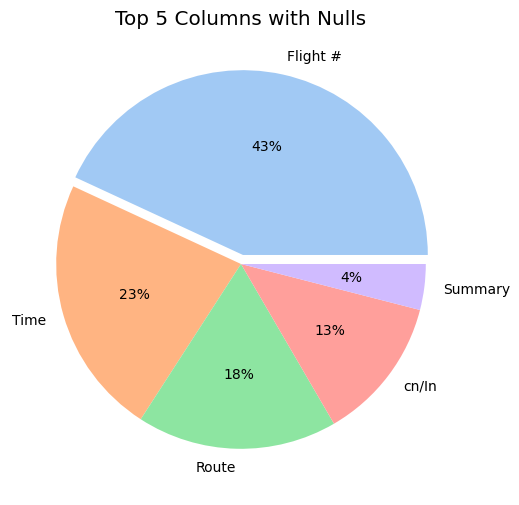

In [9]:
top_count = df.isnull().sum() #Calculates the nulls for all columns
top_nulls = top_count.nlargest(n=5) #Finds the top 5 Null columns

#Preps the colors, labels and explosion
colors = sns.color_palette('pastel') 
myexplode = [0.05, 0, 0, 0, 0]
labels = top_nulls.index.tolist() 

#Plotting the graph
plt.figure(figsize = (10,6))
plt.pie(top_nulls,labels = labels, colors = colors, explode = myexplode, autopct='%.0f%%')
plt.title('Top 5 Columns with Nulls')


plt.gcf().set_facecolor('white')
plt.show()

### From the graph above, we can see that the top 5 missing columns in the aviation data set are Flight #, Time , Route, cn/In, and summary. In regard of my EDA, Some of these columns are uneccesary and do not provide any analytical info such as Flight # and Cn/In .In regard of the time, summary and route column i will fill the null values with other entries such as "Unavailable" or "Unknown".

| Task Number | Description                      |
|-------------|----------------------------------|
| 1           | Drop Flight # Column             |
| 2           | Drop Cn/In Column                |
| 3           | Fill Nulls for fatalities        |
| 4           | Fill Nulls for ground            |
| 5           | Fill Nulls for aboard            |
| 6           | Fill Nulls for location          |
| 7           | Fill Nulls for operators         |
| 8           | Fill Nulls for route             |
| 9           | Fill Nulls for Time              |
| 10          | Fill Nulls for Summary           |
| 11          | Fill Nulls for type              |


In [10]:
warnings.filterwarnings("ignore")

#Dropping Unnecessary Columns
df.drop('Time', axis=1, inplace=True)
df.drop('Flight #', axis=1, inplace = True)
df.drop('cn/In', axis=1, inplace = True)

warnings.resetwarnings() #Removes warnings


In [11]:
df.columns

Index(['index', 'Date', 'Location', 'Operator', 'Route', 'Type',
       'Registration', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [12]:
df.head(5)

,index,Date,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [13]:
warnings.filterwarnings("ignore")

#Filling Null values with Unknown or unavailable
df.fillna({'Registration': 'Unavailable'}, inplace=True)
df.fillna({'Fatalities': 'Unknown'}, inplace=True)
df.fillna({'Ground' : 'Unknown'}, inplace=True)
df.fillna({'Aboard' : 'Unknown'}, inplace=True)
df.fillna({'Location' : 'Unavailable'}, inplace=True)
df.fillna({'Operator' : 'Unknown'}, inplace=True)
df.fillna({'Route' : 'Unavailable'},inplace=True)
df.fillna({'Time' : 'Unknown'},inplace=True)
df.fillna({'Summary' : 'Unknown'},inplace=True)
df.fillna({'Type' : 'Unknown'}, inplace=True)

warnings.resetwarnings() #Removes warnings

In [14]:
df.head(5)

,index,Date,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,Unavailable,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,Unavailable,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,"Victoria, British Columbia, Canada",Private,Unavailable,Curtiss seaplane,Unavailable,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,Over the North Sea,Military - German Navy,Unavailable,Zeppelin L-1 (airship),Unavailable,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Unavailable,Zeppelin L-2 (airship),Unavailable,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [15]:
print("\n\n Updated Rows and columns", df.shape)

print("\n Number of NaNs after Fillna")
df.isnull().sum()




 Updated Rows and columns (5268, 11)

 Number of NaNs after Fillna


index           0
Date            0
Location        0
Operator        0
Route           0
Type            0
Registration    0
Aboard          0
Fatalities      0
Ground          0
Summary         0
dtype: int64

### _Checking For duplicates and adding new columns_

#### As we can see, Our aviation data set now has no null values and the the columns which are not needed have been dropped. Following up, i am going to check for any duplicated values and split the date column in three new seperate columns of "Year" , "Month", "Day" to make it possible for better visualizations and analysis!

In [16]:
#Checks the duplicated items 
print("Duplicates in the data frame :",df.duplicated().sum()) 

Duplicates in the data frame : 0


In [17]:
df[['Month','Day','Year']] = df['Date'].str.split('/', expand=True) #Splits the data where a / is found

#Converts object to int dt
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)
df['Year'] = df['Year'].astype(int)

df.head(5)

,index,Date,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground,Summary,Month,Day,Year
0,0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,Unavailable,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",9,17,1908
1,1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,Unavailable,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,7,12,1912
2,2,08/06/1913,"Victoria, British Columbia, Canada",Private,Unavailable,Curtiss seaplane,Unavailable,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,8,6,1913
3,3,09/09/1913,Over the North Sea,Military - German Navy,Unavailable,Zeppelin L-1 (airship),Unavailable,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,9,9,1913
4,4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Unavailable,Zeppelin L-2 (airship),Unavailable,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,10,17,1913


In [18]:
#Changing data type of columns
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')
df['Aboard'] = pd.to_numeric(df['Aboard'], errors='coerce')
df['Ground'] = pd.to_numeric(df['Ground'], errors='coerce')

#Dropping Rows with NaNs
df = df.dropna(subset=['Fatalities'])
df = df.dropna(subset=['Aboard'])
df = df.dropna(subset=['Ground'])

In [19]:
print("\nInfo of the dataframe\n")
df.info() #Checking data type of new columns

print("\nNaNs in the data frame")
df.isnull().sum() #Rechecking if there are missing values


Info of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 5236 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5236 non-null   int64  
 1   Date          5236 non-null   object 
 2   Location      5236 non-null   object 
 3   Operator      5236 non-null   object 
 4   Route         5236 non-null   object 
 5   Type          5236 non-null   object 
 6   Registration  5236 non-null   object 
 7   Aboard        5236 non-null   float64
 8   Fatalities    5236 non-null   float64
 9   Ground        5236 non-null   float64
 10  Summary       5236 non-null   object 
 11  Month         5236 non-null   int32  
 12  Day           5236 non-null   int32  
 13  Year          5236 non-null   int32  
dtypes: float64(3), int32(3), int64(1), object(7)
memory usage: 552.2+ KB

NaNs in the data frame


index           0
Date            0
Location        0
Operator        0
Route           0
Type            0
Registration    0
Aboard          0
Fatalities      0
Ground          0
Summary         0
Month           0
Day             0
Year            0
dtype: int64

In [20]:
#Creating Survived column
df['Survived'] = df['Aboard'] - df['Fatalities']

#Turning column data type into int
df['Survived'] = df['Survived'].astype(int)

#Checking if column was creaated

df.columns


Index(['index', 'Date', 'Location', 'Operator', 'Route', 'Type',
       'Registration', 'Aboard', 'Fatalities', 'Ground', 'Summary', 'Month',
       'Day', 'Year', 'Survived'],
      dtype='object')

# _3 - Data Visulaziations : Providing Major Insights/Patterns through graphs_

In [21]:
#Location Types
df['Location'].value_counts() 

Location
Unavailable                          19
Moscow, Russia                       15
Sao Paulo, Brazil                    15
Rio de Janeiro, Brazil               14
Manila, Philippines                  13
                                     ..
Yunnan, Burma                         1
Bekkessamson, Romainia                1
Near Aysen, Chile                     1
Nar Augustdorf, West Germany          1
State of Arunachal Pradesh, India     1
Name: count, Length: 4281, dtype: int64

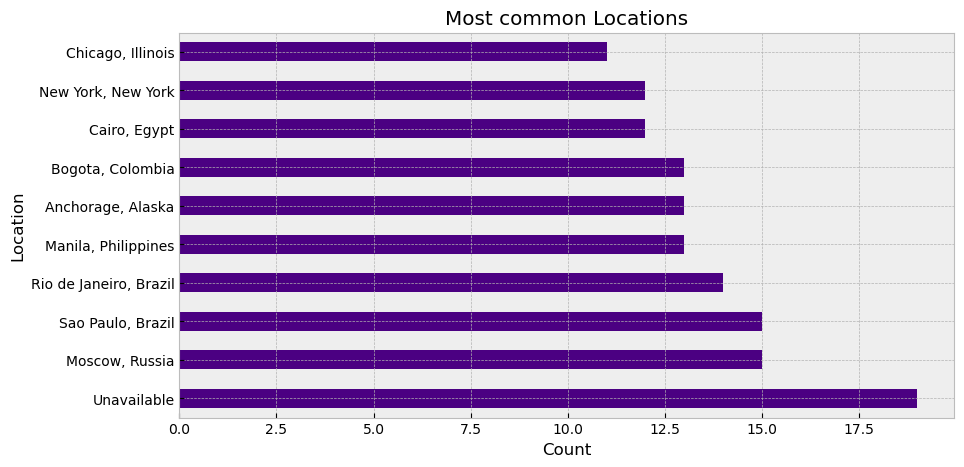

In [22]:
#Graph plotting
plt.style.use("bmh")
df['Location'].value_counts().head(10).plot(kind = 'barh',figsize=(10,5), color = "indigo")
plt.xlabel('Count')
plt.title('Most common Locations')

plt.gcf().set_facecolor('white')
plt.show()

ANALYSIS :

- When looking at the most common locations, we see that most locations are unavailable which is expected for aviation crashes.
- Most common locations tend to be in south american countries such as brazil and columbia with russia making the top 3.
- We see many other locations such as Egypt and philippines making the top 10.

In [23]:
#Operator types
df['Operator'].value_counts()

Operator
Aeroflot                               179
Military - U.S. Air Force              174
Air France                              67
Deutsche Lufthansa                      65
Air Taxi                                44
                                      ... 
Helikopter Service                       1
Gander Aviation                          1
Alaska Travel                            1
Lineas Aéreas Costarricenses  LACSA      1
Strait Air                               1
Name: count, Length: 2475, dtype: int64

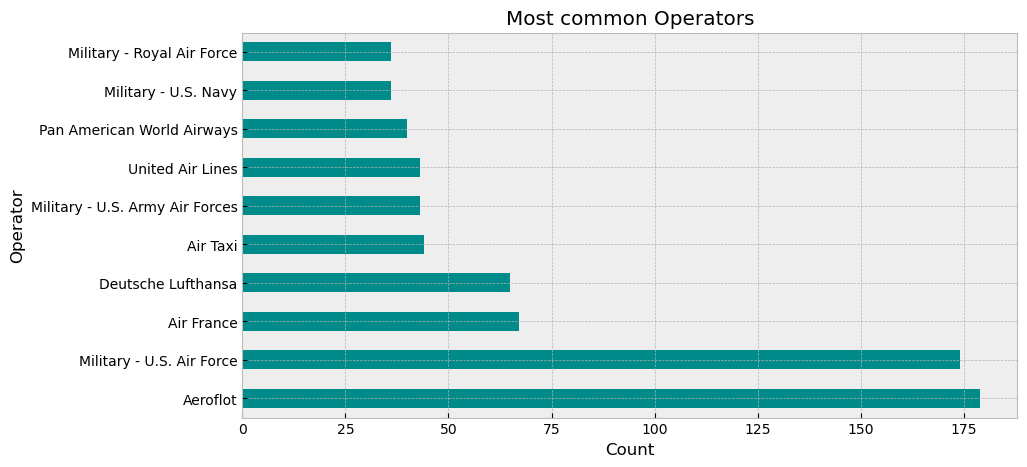

In [24]:
#Shorten for better visability
df.replace('China National Aviation Corporation','China NAC',inplace=True)

#Counting the operators
count_operator = df['Operator'].value_counts()
#Getting the top 5
top5_operator = count_operator.nlargest(n=10)

#Styling
plt.style.use("bmh")

#Graph plotting
top5_operator.plot(kind = 'barh',figsize=(10,5), color = "darkcyan")
plt.xlabel('Count')
plt.title('Most common Operators')

plt.gcf().set_facecolor('white')
plt.show()

ANALYSIS :

- The Bar chart for Operators showcases that the most common Operators are from European based countries such as Russia, Germany and France.
- In regards of Aviation, Militaries should have the most expected crashes as aircrafts are used for combat and other dangerous activities, In contrast, Airlines with simpler tasks should be safer for this reason.
- However, From this bar chart we can see that Air france, a commercial airline, has a incredibly high number for an operator that is purposely built for transport only. For this reason, this airline lacks the safety required to fly with such a high number of passangers aboard.

In [25]:
#Type types
df['Type'].value_counts()

Type
Douglas DC-3                                332
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 61
Douglas DC-4                                 40
                                           ... 
Canadair CL-44D4-1                            1
Lockheed L-1649A Starliner                    1
Tupolev TU-114B                               1
PBY-5A Catalina                               1
Airbus A330-203                               1
Name: count, Length: 2436, dtype: int64

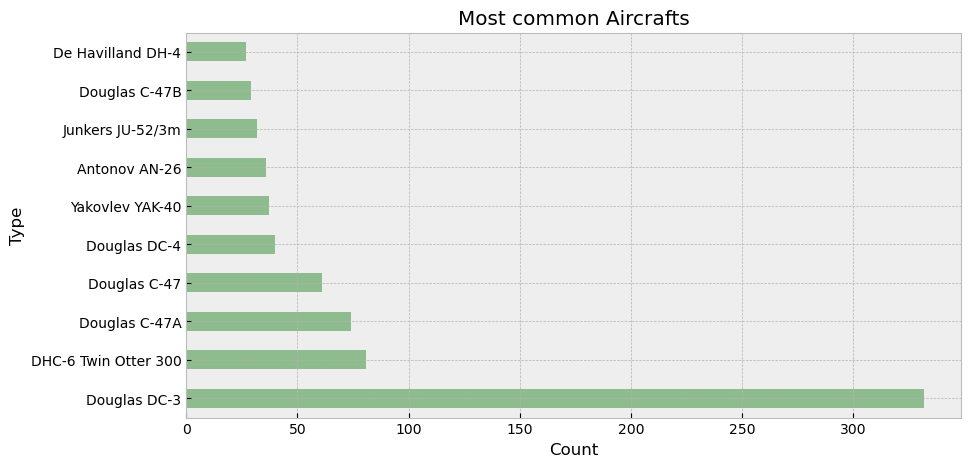

In [26]:
#Shorten the name for better visibility
df.replace('de Havilland Canada DHC-6 Twin Otter 300','DHC-6 Twin Otter 300',inplace=True)

#Styling
plt.style.use("bmh")

#Graph Plotting
df['Type'].value_counts().head(10).plot(kind = 'barh',figsize = (10,5), color = "darkseagreen")
plt.xlabel('Count')
plt.title('Most common Aircrafts')

plt.gcf().set_facecolor('white')
plt.show()

ANALYSIS :

- When we observe the bar chart for most common aircraft, we can see that the Douglas DC-3 is the most common aircraft involved in aviation crashes.This aircraft is built by the Douglas Aircraft Company (known as DAC).
- While the Douglas DC-3 is the most common, among the top 5 we see 3 other Douglas Aircrafts (DC-4, C47-A and the C47)
- This common occurance of the Douglas Aircraft Company raises suspicion in the safety of their aircrafts and their proceedures on their trips with these aircrafts.

In [27]:
#Route types
df['Route'].value_counts()

Route
Unavailable                     1687
Training                          80
Sightseeing                       29
Test flight                       17
Test                               6
                                ... 
Peoria, IL - St. Louis, MO         1
London - Zurich                    1
Aguascalientes - Mexico City       1
Windhoek - Luanda                  1
Mechuka for Jorhat                 1
Name: count, Length: 3235, dtype: int64

<h2 style="text-align: center;">Analysing Fatalities with other columns</h2>

In [28]:
#seeing all of the unique years
df['Year'].unique()

array([1908, 1912, 1913, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1925, 1923, 1924, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1949, 1948, 1950, 1951, 1966, 1952, 1953, 1970,
       1955, 1954, 1958, 1956, 1957, 1962, 1959, 1960, 1973, 1961, 1964,
       1963, 1965, 1975, 1967, 1968, 1969, 1971, 1988, 1991, 1972, 1974,
       1976, 1977, 1978, 1979, 1980, 1981, 1983, 1982, 1987, 1984, 1986,
       1985, 1989, 1990, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2001, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])

In [29]:
#Grouping by year and fatalities to find mean
yearly_fatalities = df.groupby('Year')['Fatalities'].sum().mean()

print("Average Fatalities per Year : ",yearly_fatalities)

Average Fatalities per Year :  1074.1734693877552


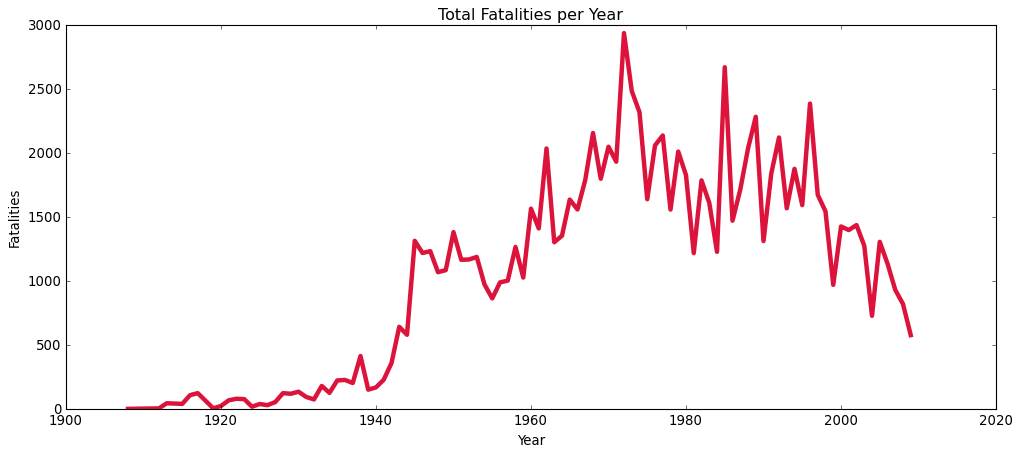

In [30]:
# Group by Year and sum the Fatalities
yearly_fatalities = df.groupby('Year')['Fatalities'].sum()

#Styling
plt.style.use("classic")

# Plotting the result
yearly_fatalities.plot(figsize=(15, 6),linewidth=4, color = 'crimson')
plt.ylabel('Fatalities')
plt.xlabel('Year')
plt.title('Total Fatalities per Year')


plt.gcf().set_facecolor('white')
plt.show()


In [31]:
#Find unique items for month
df['Month'].unique()

array([ 9,  7,  8, 10,  3, 11,  5,  6,  4, 12,  2,  1])

In [32]:
#Grouping by month and fatalities to find mean
monthly_fatalities = df.groupby('Month')['Fatalities'].sum().mean()

print("Average Fatalities per month : ",monthly_fatalities)

Average Fatalities per month :  8772.416666666666


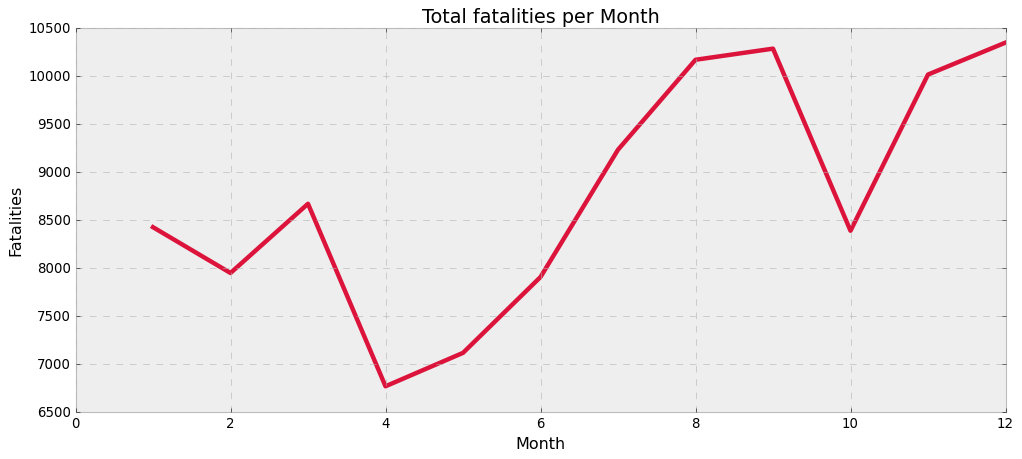

In [33]:
# Group by Month and sum the Fatalities
Monthly_fatalities = df.groupby('Month')['Fatalities'].sum()

#Styling
plt.style.use("bmh")

# Plotting the results
Monthly_fatalities.plot(figsize=(15, 6), linewidth = 4, color = 'crimson')
plt.ylabel('Fatalities')
plt.xlabel('Month')
plt.title('Total fatalities per Month')

plt.gcf().set_facecolor('white')
plt.show()

In [34]:
#Stats for fatalities
print("\nFatalities Statistical info")
df['Fatalities'].describe()


Fatalities Statistical info


count    5236.000000
mean       20.104851
std        33.238341
min         0.000000
25%         3.000000
50%         9.000000
75%        23.000000
max       583.000000
Name: Fatalities, dtype: float64

In [35]:
#Stats for fatalities
print('\nnAboard Statistical info')
df['Aboard'].describe()


nAboard Statistical info


count    5236.000000
mean       27.589190
std        43.109636
min         0.000000
25%         5.000000
50%        13.000000
75%        30.000000
max       644.000000
Name: Aboard, dtype: float64

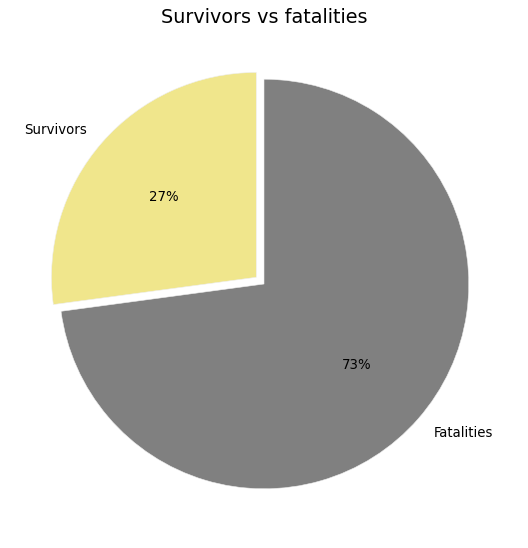

In [36]:
#Calculating amount of fataltiies and survival
total_fatalities = df['Fatalities'].sum()
total_survived = df['Survived'].sum()

#Explode quarts
myexplode = [0.05, 0]


plt.figure(figsize = (10,8))
plt.pie([total_survived,total_fatalities],labels =['Survivors','Fatalities'],explode = myexplode,colors = ['khaki','grey'], startangle=90, autopct='%.0f%%')


plt.style.use("bmh")
plt.gcf().set_facecolor('white')
plt.title('Survivors vs fatalities')
plt.show()



ANALYSIS :

From the pie chart above, we can see that there are more fatalities than survivors. there is a massive amount of fatalities with 73% while there are only 27% survivors. This is relatively low and this showcases that most aviation crashes do not have a high chance of survival

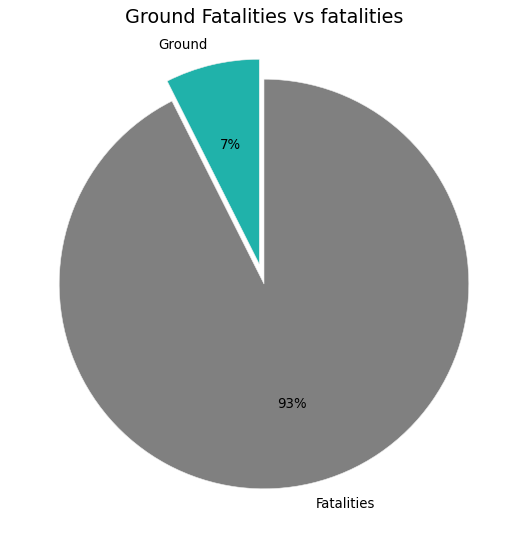

In [37]:
#Calculating amount of fataltiies and ground fatalities
total_fatalities = df['Fatalities'].sum()
total_ground = df['Ground'].sum()

#Explode quarts
myexplode = [0.1, 0]
colors = sns.color_palette('pastel') 

plt.figure(figsize = (10,8))
plt.pie([total_ground,total_fatalities],labels =['Ground','Fatalities'],explode = myexplode,colors = ['lightseagreen','grey'], startangle=90, autopct='%.0f%%')


plt.style.use("bmh")
plt.gcf().set_facecolor('white')
plt.title('Ground Fatalities vs fatalities')
plt.show()


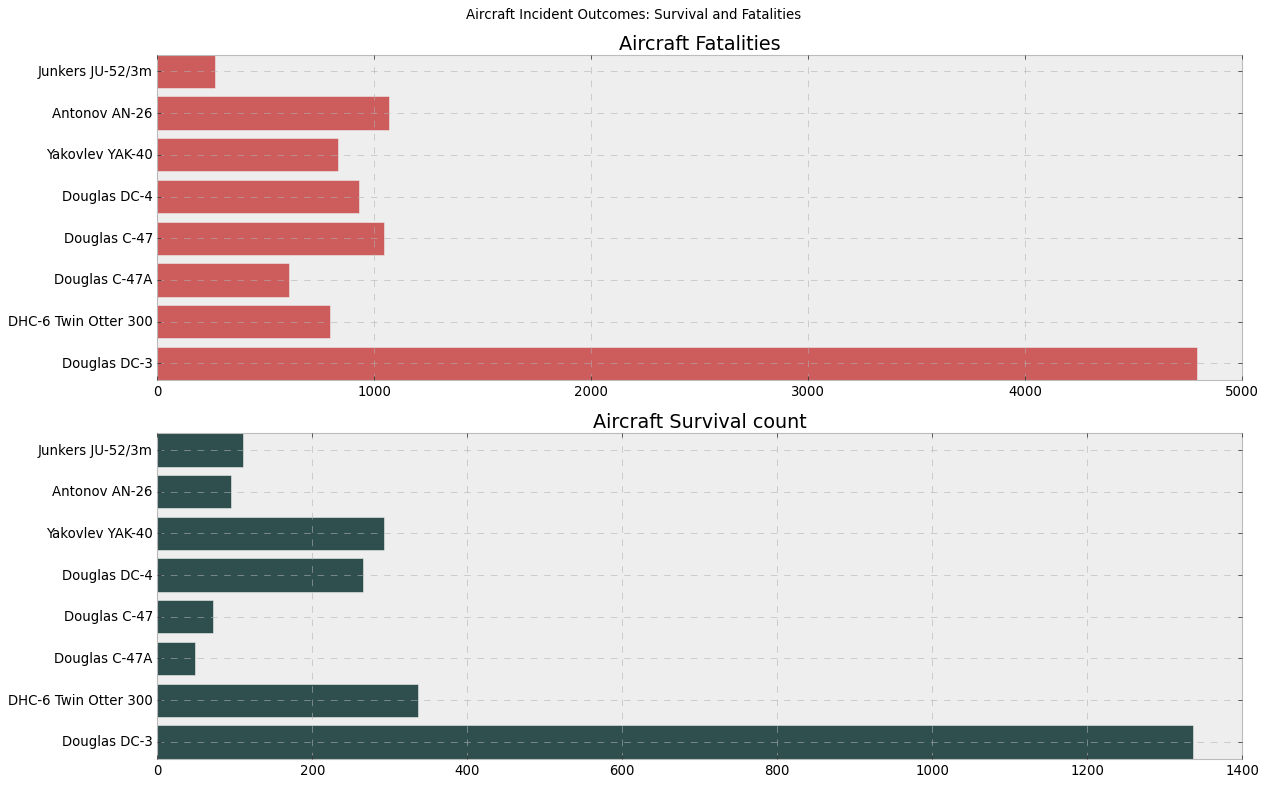

In [38]:
# Get the top 10 aircraft types
top8_aircraft = df['Type'].value_counts()[:8].index

# Filter the DataFrame to only include rows with top 8 aircraft types
filtered_df = df[df['Type'].isin(top8_aircraft)]

# Group by Type and sum the values for fatalities and ground fatalities
fatalities_by_type = filtered_df.groupby('Type')['Fatalities'].sum().loc[top8_aircraft]
survival_by_type = filtered_df.groupby('Type')['Survived'].sum().loc[top8_aircraft]

# Plot
fig, ((ax1, ax3)) = plt.subplots(2, 1,figsize=(16, 10))
fig.suptitle('Aircraft Incident Outcomes: Survival and Fatalities')

#Graph 1 : fatalities
ax1.barh(top8_aircraft, fatalities_by_type, color='indianred')
ax1.set_title('Aircraft Fatalities')
ax1.grid(True)


#Graph 3 : Survival count
ax3.barh(top8_aircraft, survival_by_type, color='darkslategrey')
ax3.set_title('Aircraft Survival count')
ax3.grid(True)

plt.style.use("bmh")
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()


In [39]:
df.columns

Index(['index', 'Date', 'Location', 'Operator', 'Route', 'Type',
       'Registration', 'Aboard', 'Fatalities', 'Ground', 'Summary', 'Month',
       'Day', 'Year', 'Survived'],
      dtype='object')

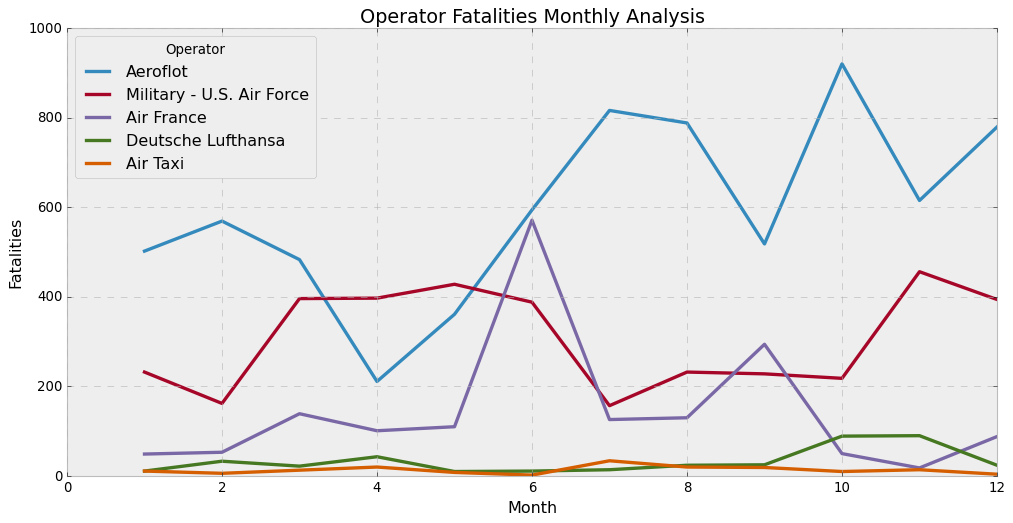

In [40]:
# Filter top 5 Operators

top5_operators = df['Operator'].value_counts().head(5).index
filtered_df = df[df['Operator'].isin(top5_operators)]

#Grouping the columns
Fatalities_by_Operator = (
    filtered_df
    .groupby(['Month', 'Operator'])['Fatalities']
    .sum()
    .unstack()
    .fillna(0)
    .sort_index()
)

#Graph plotting
Fatalities_by_Operator[top5_operators].plot(figsize=(15, 7), linewidth = 3)

#Title and labels
plt.style.use("bmh")
plt.title('Operator Fatalities Monthly Analysis')
plt.ylabel('Fatalities')


plt.gcf().set_facecolor('white')
plt.show()
